In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [12]:
# download the checkpoint demo
config_file = '../work_dirs/rtmdet_l/rtmdet_l.py'
checkpoint_file = '../work_dirs/rtmdet_l/epoch_3.pth'

config_file = '../work_dirs/dino/dino.py'
checkpoint_file = '../work_dirs/dino/epoch_3.pth'

In [13]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: ../work_dirs/dino/epoch_3.pth


In [14]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/hans/mambaforge/envs/openmmlab/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


In [15]:
# test a single image
img = mmcv.imread( '../data/ic_bin/val/000000/rgb/000004.jpg', channel_order='rgb')
result = inference_detector(model, img)


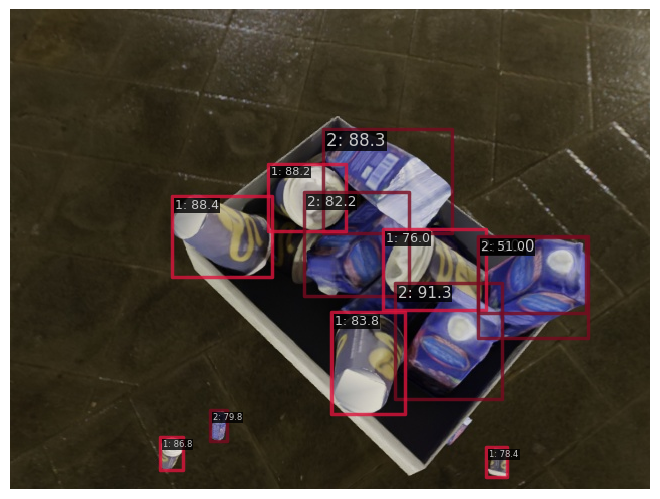

In [17]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
    out_file=None,
    pred_score_thr=0.5
)

visualizer.show()